<a href="https://colab.research.google.com/github/JavohirTF7/machine-learning/blob/main/Bemorga_dori_tavsiya_qilish_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report


In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.head(6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
170,28,0,2,0,12.879,drugX
74,31,1,0,1,17.069,drugY
139,69,0,2,0,10.065,drugX
171,45,1,1,1,10.017,drugX
26,31,1,0,0,30.366,drugY
168,51,0,1,1,23.003,drugY
79,32,0,1,1,10.840,drugX
59,34,1,0,0,18.703,drugY
110,50,1,0,0,7.490,drugA
75,26,1,1,1,20.909,drugY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [7]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = df['Drug'].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

## Machine learning

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [9]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Baholash

In [10]:
y_predict = tree_model.predict(X_test)
y_predict

array(['drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugC', 'drugC', 'drugC', 'drugB', 'drugY', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugC', 'drugX', 'drugY', 'drugY', 'drugA',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugY',
       'drugB', 'drugC', 'drugA', 'drugX', 'drugX', 'drugC', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugA', 'drugY', 'drugC',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugC',
       'drugC', 'drugB', 'drugC', 'drugB', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX'], dtype=object)

In [11]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [12]:
print("DecisionTrees's Accuracy: ", {metrics.accuracy_score(y_test, y_predict)})

NameError: ignored

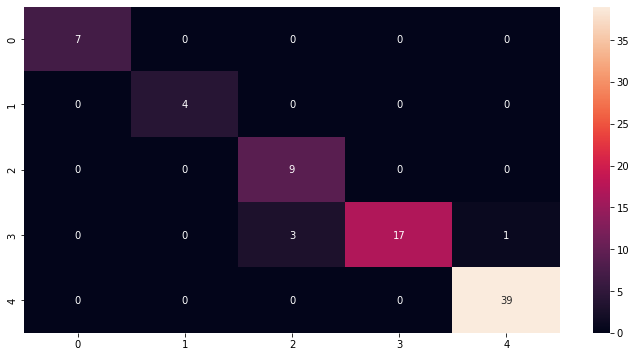

In [13]:

plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

### Cross validation

In [14]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



Decision Tree Chizish

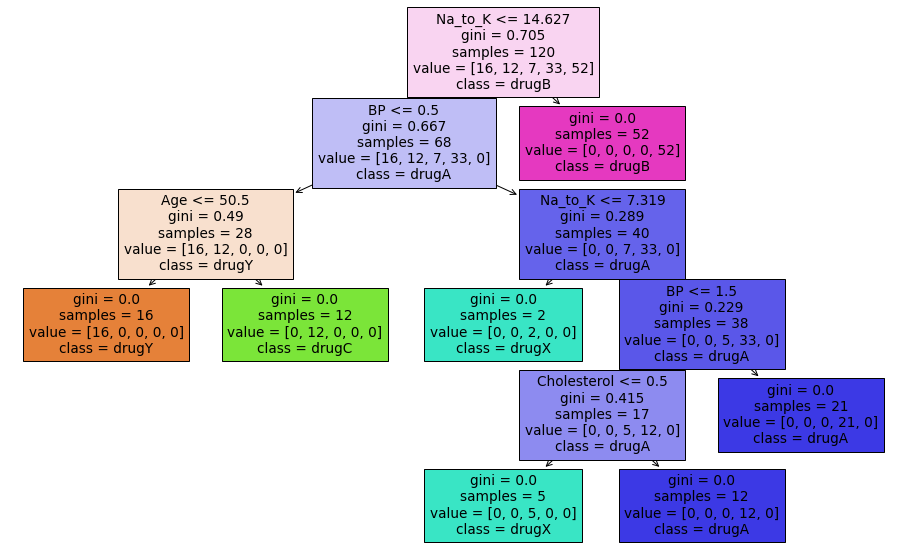

In [15]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(16,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

##hyperparametres

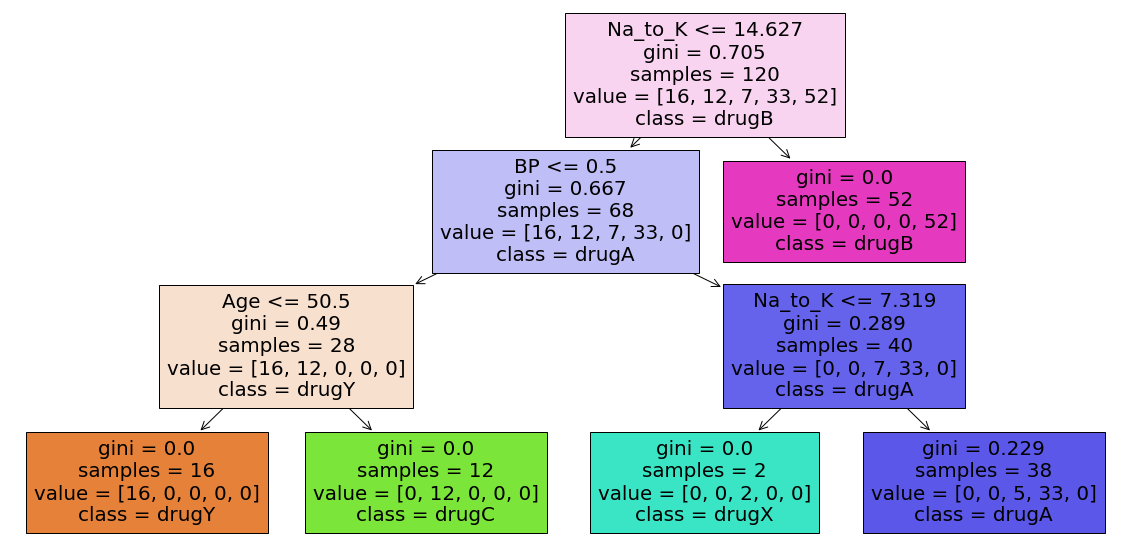

In [22]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01,max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

###Random Forest

In [26]:
rf_model = RandomForestClassifier(n_estimators=14)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.56      0.71         9
       drugX       0.83      0.95      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.94        80
   macro avg       0.96      0.90      0.92        80
weighted avg       0.94      0.94      0.93        80

